# This notebook demonstrates:
### 1. Read in HEALPix data to get one snapshot of OLR & precipitation
### 2. Remap them to a lat/lon grid for MCS tracking

### Contacts:
- Zhe Feng (zhe.feng@pnnl.gov)
- Andrew Gettelman (andrew.gettelman@pnnl.gov)

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib as mpl
import matplotlib.pyplot as plt

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

/global/common/software/m1867/python/hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
# HEALPix data directory
hp_dir = '/pscratch/sd/w/wcmca1/scream-cess-healpix/'

# OBS lat/lon grid
obs_mapfile = '/pscratch/sd/f/feng045/DYAMOND/maps/IMERG_landmask_180W-180E_60S-60N.nc'

In [4]:
# Read OBS lat/lon grid
dsobs = xr.open_dataset(obs_mapfile)
lon = dsobs.lon.data
lat = dsobs.lat.data
dsobs

<xarray.Dataset> Size: 17MB
Dimensions:      (lon: 3600, lat: 1200)
Coordinates:
  * lon          (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * lat          (lat) float64 10kB -59.95 -59.85 -59.75 ... 59.75 59.85 59.95
Data variables:
    landseamask  (lat, lon) float32 17MB ...
Attributes:
    produced_by:  make_imerg_landmask_60S-60N.ipynb

## Read HEALPix data and plot

CPU times: user 3.91 s, sys: 1.97 s, total: 5.88 s
Wall time: 3.19 s


Text(0.5, 1.0, 'SCREAM OLR 2020-06-01T00 HEALPix Level 10 (6km)')

<Figure size 1200x800 with 0 Axes>

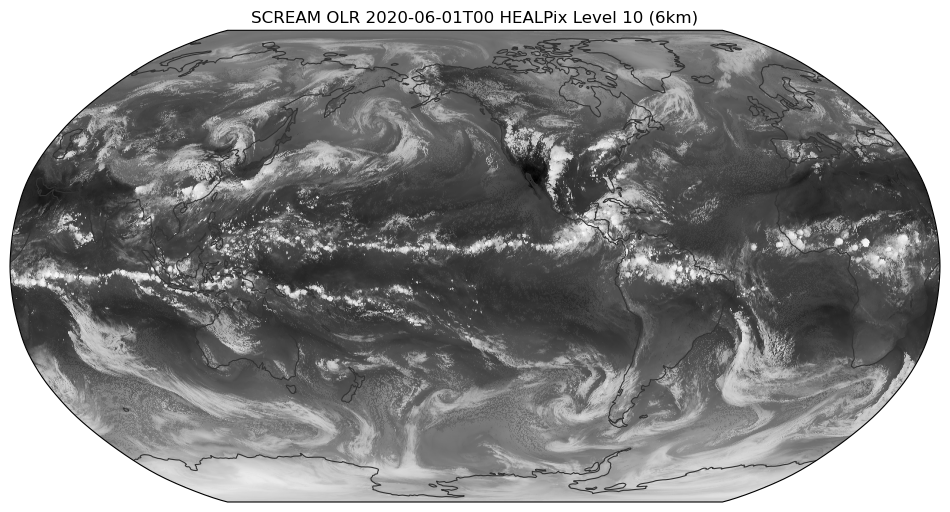

In [5]:
%%time
# Zoom level; resolution
s='10' ; dkm='6'
res = ' ('+dkm+'km)'

# Zarr file directory
fn_olr = hp_dir + "scream2D_hrly_" + "rlut" + "_hp" + s + "_v6.zarr"

# Read HEALPix zarr file
ds_olr = xr.open_dataset(fn_olr)

# Add coordinates (lat and lon)
ds_olr = ds_olr.pipe(egh.attach_coords)
olr = ds_olr["rlut"]
# print(ds_olr.time)

tm = '2020-06-01T00'
# if (var == 'rlut'): cmap = 'binary'
# if (var == 'pr'): cmap = 'plasma'
    
egh.healpix_show(olr.sel(time=tm).squeeze(), cmap='binary')
plt.title('SCREAM '+'OLR'+' '+tm+' HEALPix Level '+s+res)

In [12]:
ds_olr.time

<xarray.DataArray 'time' (time: 9457)> Size: 76kB
array([cftime.DatetimeNoLeap(2019, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 8, 1, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 8, 1, 2, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2020, 8, 31, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2020, 8, 31, 23, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2020, 9, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 76kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
    crs      int64 8B 0
Attributes:
    long_name:  time

CPU times: user 3.59 s, sys: 1.15 s, total: 4.74 s
Wall time: 2.38 s


Text(0.5, 1.0, 'SCREAM Precip 2020-06-01T00 HEALPix Level 10 (6km)')

<Figure size 1200x800 with 0 Axes>

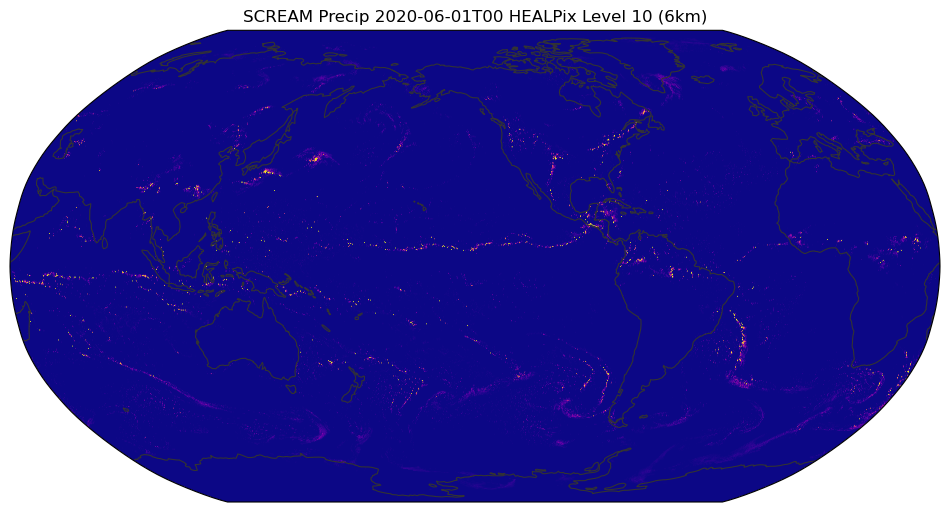

In [6]:
%%time
# Zoom level; resolution
s='10' ; dkm='6'
res = ' ('+dkm+'km)'
# Zarr file directory
fn_pr = hp_dir + "scream2D_hrly_" + "pr" + "_hp" + s + "_v6.zarr"

# Read HEALPix zarr file
ds_pr = xr.open_dataset(fn_pr)

# Add coordinates (lat and lon)
ds_pr = ds_pr.pipe(egh.attach_coords)
# print(ds_pr.time)

tm = '2020-06-01T00'

# Convert precipitation flux from [m/s] to [mm/h]
pcp = ds_pr["pr"].sel(time=tm).squeeze() * 1000 * 3600
pcp.attrs['units'] = 'mm/h'

egh.healpix_show(pcp, vmin=0.1, vmax=20, cmap='plasma')
plt.title('SCREAM '+'Precip'+' '+tm+' HEALPix Level '+s+res)

In [7]:
# Get a sample snapshot data
# olr = ds['rlut'].sel(time='2020-06-01')[0]
# olr = ds_olr['rlut'].sel(time='2020-06-01')[0]
olr = ds_olr['rlut'].sel(time=tm).squeeze()

# Convert precipitation flux from [m/s] to [mm/h]
pcp = ds_pr["pr"].sel(time=tm).squeeze() * 1000 * 3600
pcp.attrs['units'] = 'mm/h'

olr

<xarray.DataArray 'rlut' (cell: 12582912)> Size: 50MB
[12582912 values with dtype=float32]
Coordinates:
    time     object 8B 2020-06-01 00:00:00
    crs      int64 8B 0
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat      (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon      (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Attributes:
    long_name:  LW_flux_up_at_model_top
    units:      W/m2

In [8]:
pcp

<xarray.DataArray 'pr' (cell: 12582912)> Size: 50MB
array([5.1693494e-09, 0.0000000e+00, 0.0000000e+00, ..., 1.4230592e-06,
       0.0000000e+00, 0.0000000e+00], dtype=float32)
Coordinates:
    time     object 8B 2020-06-01 00:00:00
    crs      int64 8B 0
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat      (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon      (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Attributes:
    units:    mm/h

## Regrid to a lat/lon grid

In [9]:
%%time
# Find the HEALPix pixels that are closest to the target grid points.
pix = xr.DataArray(
    hp.ang2pix(olr.crs.healpix_nside, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(("lat", lat), ("lon", lon)),
)
# pix

# Regrid world map for a given variable and time, load data into memory
olr_regrid = olr.drop_vars(["lat", "lon"]).isel(cell=pix).load()
pcp_regrid = pcp.drop_vars(["lat", "lon"]).isel(cell=pix).load()
olr_regrid

CPU times: user 3.06 s, sys: 2.12 s, total: 5.19 s
Wall time: 2.66 s


<xarray.DataArray 'rlut' (lat: 1200, lon: 3600)> Size: 17MB
array([[217.96666, 217.11018, 215.81235, ..., 220.15085, 221.12865,
        218.6062 ],
       [221.29607, 231.11795, 222.67683, ..., 221.26115, 220.92271,
        220.0993 ],
       [218.9528 , 219.92787, 228.76276, ..., 220.95291, 221.76767,
        220.69376],
       ...,
       [245.38272, 245.3804 , 245.19809, ..., 244.66853, 245.06416,
        245.28337],
       [244.38214, 244.8984 , 244.53159, ..., 243.85927, 244.24063,
        244.16856],
       [243.80588, 244.18433, 243.91255, ..., 243.36592, 243.57341,
        243.6595 ]], dtype=float32)
Coordinates:
    time     object 8B 2020-06-01 00:00:00
    crs      int64 8B 0
    cell     (lat, lon) int64 35MB 11042946 11042947 ... 1539964 1539965
  * lat      (lat) float64 10kB -59.95 -59.85 -59.75 ... 59.75 59.85 59.95
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
Attributes:
    long_name:  LW_flux_up_at_model_top
    units:      W/m2

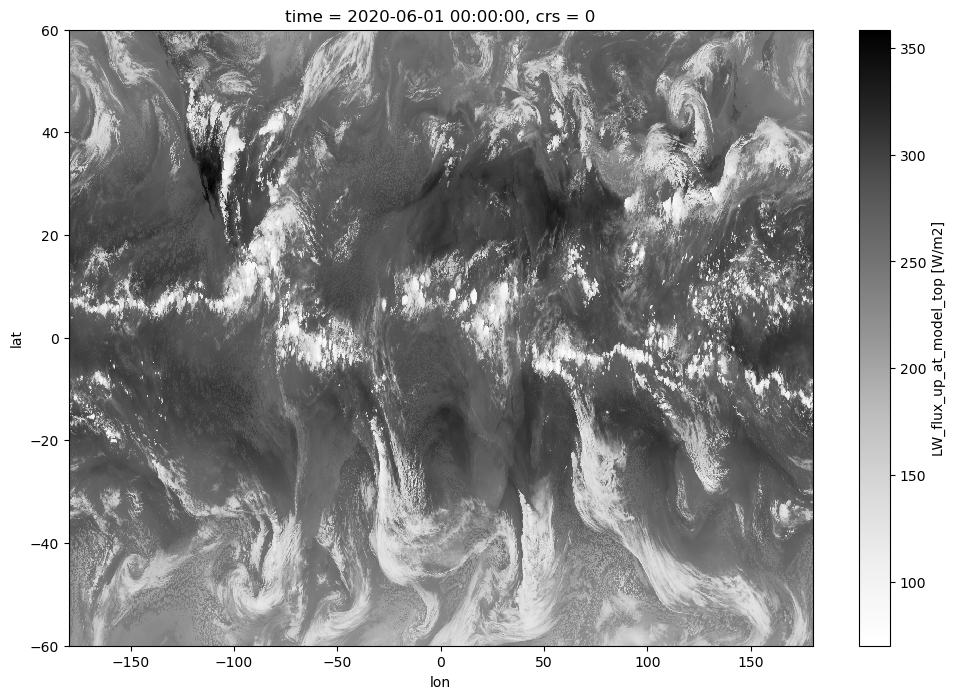

In [10]:
# Plot OLR
olr_regrid.plot(cmap='Greys')

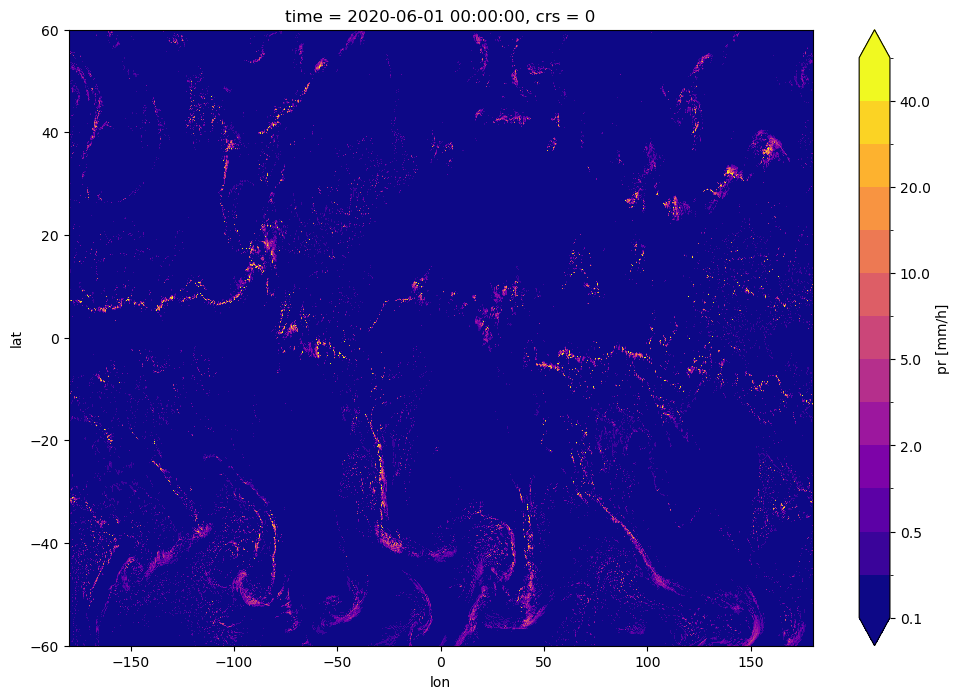

In [11]:
# Plot precip
levels = [0.1,0.2,0.5,1,2,3,5,7,10,15,20,30,40,60]
cmap = mpl.colormaps.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
pcp_regrid.plot(norm=norm, cmap=cmap)